# <span style = 'background : yellow'> ADP 실기 파이썬.ver

## 정형 데이터 마이닝

### Q-1) 결측값 10000개 이상 컬럼 제외하고 결측값 잇는 행 제거. <br>Data 컬럼을 Date형으로 변환하고 train(70%), test(30%)로 데이터 분할(seed 6789 고정)
### Q-2) train데이터로 RainTomorrow 예측하는 모델 3개이상 생성하고 test 데이터 예측값 csv로 제출
### Q-3) 각 모델 평가하고 정확도 비교 및 설명, ROC_CURVE 그리고 AUC 산출 

### 1) Package Import

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.metrics import *
from xgboost import XGBClassifier

### 2) Load Data

In [125]:
df = pd.read_csv("C:/Users/kcisa/Desktop/ADP실기/모의고사 4회/weatherAUS.csv")

In [126]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    132863 non-null  object 
 6   WindGustSpeed  132923 non-null  float64
 7   WindDir9am     132180 non-null  object 
 8   WindDir3pm     138415 non-null  object 
 9   WindSpeed9am   140845 non-null  float64
 10  WindSpeed3pm   139563 non-null  float64
 11  Humidity9am    140419 non-null  float64
 12  Humidity3pm    138583 non-null  float64
 13  Pressure9am    128179 non-null  float64
 14  Pressure3pm    128212 non-null  float64
 15  Cloud9am       88536 non-null   float64
 16  Cloud3pm       85099 non-null   float64
 17  Temp9am        141289 non-nul

### 3) Data Wrangling

In [184]:
df.columns[df.isnull().sum() < 10000] # 결측치 10000개 미만인 컬럼 추출

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [129]:
AUS_1 = df[df.columns[df.isnull().sum() < 10000]] # 결측치 10000개 미만인 컬럼만 사용

In [130]:
AUS_1.Date = pd.to_datetime(AUS_1.Date) # Date 컬럼 Date형으로 변환

In [131]:
AUS_1.dropna(how = 'any', inplace = True) # 결측치 존재 행 삭제

In [132]:
AUS_1['year'] = AUS_1.Date.dt.year # Date 컬럼으로부터 year 컬럼 생성

In [133]:
AUS_1['month'] = AUS_1.Date.dt.month# Date 컬럼으로부터 month 컬럼 생성

In [134]:
AUS_1.drop('Date', axis = 1, inplace = True) # Date 컬럼 삭제

In [135]:
AUS_1 = pd.get_dummies(columns = ['Location', 'WindGustDir', 'WindDir3pm'], data = AUS_1) # 문자형 컬럼 더미화

In [136]:
AUS_1.RainToday = AUS_1.RainToday.map({"No" : 0, "Yes" : 1}) # 이진 변수는 0, 1처리

In [137]:
X = AUS_1.drop('RainTomorrow', axis = 1) # X 데이터 설정
y = AUS_1.RainTomorrow.map({'No' : 0, "Yes" : 1}) # target 데이터 설정

In [138]:
np.random.seed(6789) # 시드 고정
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .7, test_size = .3, shuffle = True) # 데이터 분할

In [139]:
len(X_train), len(X_test), len(y_train), len(y_test)

(90003, 38573, 90003, 38573)

### 4) Modeling

In [204]:
model1 = DecisionTreeClassifier(random_state = 1130).fit(X_train, y_train) # 의사결정나무
model2 = RandomForestClassifier(random_state = 1130).fit(X_train, y_train) # 랜덤포레스트
model3 = GradientBoostingClassifier(random_state = 1130).fit(X_train, y_train) # 그래디언트 부스팅
model4 = XGBClassifier(random_state = 1130).fit(X_train, y_train) # xgboost

### 5) Prediction

In [205]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

In [220]:
sub1 = ['Yes' if x == 1 else 'No' for x in pred1]
sub1 = pd.DataFrame({'RainTomorrow' : sub1}, index = X_test.index)

In [234]:
sub2 = ['Yes' if x == 1 else 'No' for x in pred2]
sub2 = pd.DataFrame({'RainTomorrow' : sub2}, index = X_test.index)

In [233]:
sub3 = ['Yes' if x == 1 else 'No' for x in pred3]
sub3 = pd.DataFrame({'RainTomorrow' : sub3}, index = X_test.index)

In [ ]:
#sub1.to_csv("model1_prediction.csv", index = False)
#sub2.to_csv("model2_prediction.csv", index = False)
#sub3.to_csv("model3_prediction.csv", index = False)

### 6) Classification_report

In [187]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     30208
           1       0.51      0.52      0.52      8365

    accuracy                           0.79     38573
   macro avg       0.69      0.69      0.69     38573
weighted avg       0.79      0.79      0.79     38573



#### 의사결정나무의 정확도는 79%를 달성했다.
***

In [148]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     30208
           1       0.76      0.48      0.59      8365

    accuracy                           0.85     38573
   macro avg       0.82      0.72      0.75     38573
weighted avg       0.85      0.85      0.84     38573



#### 랜덤포레스트의 정확도는 85%를 달성했다.
***

In [149]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     30208
           1       0.75      0.48      0.58      8365

    accuracy                           0.85     38573
   macro avg       0.81      0.72      0.75     38573
weighted avg       0.84      0.85      0.84     38573



#### 그래디언트부스팅의 정확도는 85%를 달성했다.
***

In [206]:
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     30208
           1       0.74      0.53      0.62      8365

    accuracy                           0.86     38573
   macro avg       0.81      0.74      0.77     38573
weighted avg       0.85      0.86      0.85     38573



#### xgboost의 정확도는 86%를 달성했다.
***

### 7) ROC_CURVE

In [161]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred1)

In [162]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred2)

In [163]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, pred3)

In [207]:
fpr4, tpr4, thresholds4 = roc_curve(y_test, pred4)

In [213]:
def plot_roc_curve(fpr, tpr, label = None) :
    plt.plot(fpr, tpr, linewidth = 2, label = label, linestyle =  '--',color = 'r')
    plt.plot([0,1], [0,1], color = 'b')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

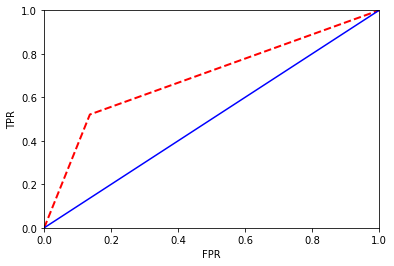

In [214]:
plot_roc_curve(fpr1, tpr1)

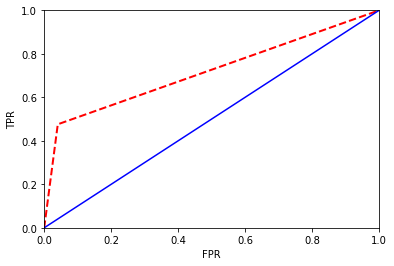

In [215]:
plot_roc_curve(fpr2, tpr2)

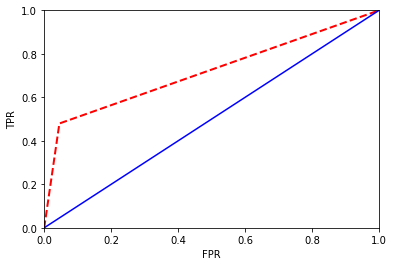

In [216]:
plot_roc_curve(fpr3, tpr3)

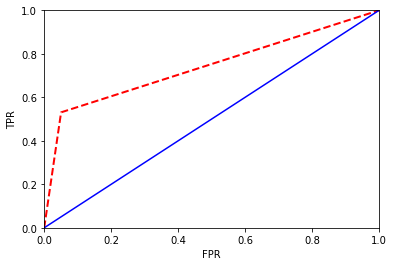

In [217]:
plot_roc_curve(fpr4, tpr4)

### 8) Claculate AUC

In [201]:
roc_auc_score(y_test, pred1)

0.6923229505949425

In [200]:
roc_auc_score(y_test, pred2)

0.7177229032325468

In [202]:
roc_auc_score(y_test, pred3)

0.7171923874130001

In [218]:
roc_auc_score(y_test, pred4)

0.7402859520474738

xgboost 모델의 auc가 가장 높은 것을 알 수 있다.